In [1]:
# Load data
import pandas as pd
train = pd.read_csv('C:/Trang/Python/dataset/loan_prediction_iii/train.csv')
test = pd.read_csv('C:/Trang/Python/dataset/loan_prediction_iii/test.csv')

In [2]:
# Data Exploration
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [3]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [4]:
train.shape

(614, 13)

In [5]:
train.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [6]:
# Categorical variables
categorical_variables = train.dtypes.loc[train.dtypes=='object'].index
#train.dtypes=='object'

In [7]:
categorical_variables

Index([u'Loan_ID', u'Gender', u'Married', u'Dependents', u'Education',
       u'Self_Employed', u'Property_Area', u'Loan_Status'],
      dtype='object')

In [8]:
train[categorical_variables].apply(lambda x: len(x.unique()))

Loan_ID          614
Gender             3
Married            3
Dependents         5
Education          2
Self_Employed      3
Property_Area      3
Loan_Status        2
dtype: int64

In [9]:
pd.concat([train['Gender'].value_counts(dropna =False).rename('Count'),100*train['Gender'].value_counts(dropna =False).rename('Percent')/train.shape[0]],axis=1)

,Count,Percent
Male,489,79.641694
Female,112,18.241042
NaN,13,2.117264


In [10]:
pd.concat([train['Married'].value_counts(dropna =False).rename('Count'),100*train['Married'].value_counts(dropna =False).rename('Percent')/train.shape[0]],axis=1)

,Count,Percent
Yes,398,64.820847
No,213,34.690554
NaN,3,0.488599


In [11]:
pd.concat([train['Dependents'].value_counts(dropna=False).rename('Count'),100*train['Dependents'].value_counts(dropna=False).rename('Percent')/train.shape[0]],axis=1)

,Count,Percent
0,345,56.188925
1,102,16.612378
2,101,16.449511
3+,51,8.306189
NaN,15,2.442997


In [12]:
#train['Education'].value_counts()
pd.concat([train['Education'].value_counts(dropna=False).rename('Count'),100*train['Education'].value_counts(dropna=False).rename('Percent')/train.shape[0]],axis=1)

,Count,Percent
Graduate,480,78.175896
Not Graduate,134,21.824104


In [13]:
#Self_Employed
pd.concat([train['Self_Employed'].value_counts(dropna=False).rename('Count'),100*train['Self_Employed'].value_counts(dropna=False).rename('Percent')/train.shape[0]],axis=1)

,Count,Percent
No,500,81.433225
Yes,82,13.355049
NaN,32,5.211726


In [14]:
pd.concat([train['Property_Area'].value_counts(dropna=False).rename('Count'),100*train['Property_Area'].value_counts(dropna=False).rename('Percent')/train.shape[0]],axis=1)

,Count,Percent
Semiurban,233,37.947883
Urban,202,32.899023
Rural,179,29.153094


In [15]:
pd.concat([train['Loan_Status'].value_counts(dropna=False).rename('Count'),100*train['Loan_Status'].value_counts(dropna=False).rename('Percent')/train.shape[0]],axis=1)

,Count,Percent
Y,422,68.729642
N,192,31.270358


In [16]:
train[train.isnull().any(axis=1)]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
11,LP001027,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y
16,LP001034,Male,No,1,Not Graduate,No,3596,0.0,100.0,240.0,NaN,Urban,Y
19,LP001041,Male,Yes,0,Graduate,NaN,2600,3500.0,115.0,NaN,1.0,Urban,Y
23,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
24,LP001052,Male,Yes,1,Graduate,NaN,3717,2925.0,151.0,360.0,NaN,Semiurban,N
29,LP001087,Female,No,2,Graduate,NaN,3750,2083.0,120.0,360.0,1.0,Semiurban,Y
30,LP001091,Male,Yes,1,Graduate,NaN,4166,3369.0,201.0,360.0,NaN,Urban,N
35,LP001106,Male,Yes,0,Graduate,No,2275,2067.0,NaN,360.0,1.0,Urban,Y
36,LP001109,Male,Yes,0,Graduate,No,1828,1330.0,100.0,NaN,0.0,Urban,N


In [17]:
# chart for continuous variables
%matplotlib inline

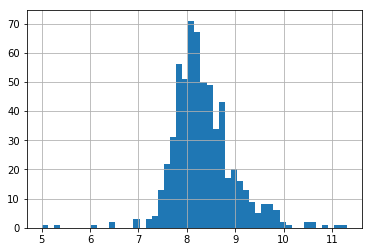

In [18]:
import numpy as np
np.log(train['ApplicantIncome']).hist(bins=50)

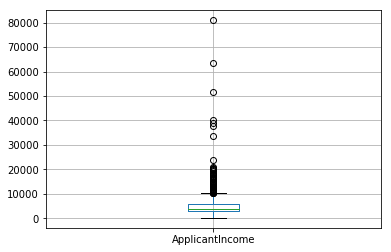

In [19]:
train.boxplot(column='ApplicantIncome')

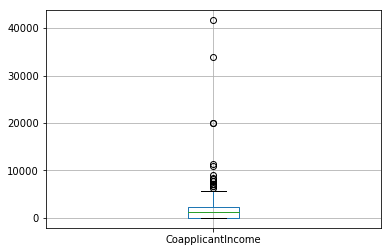

In [20]:
train.boxplot(column='CoapplicantIncome')

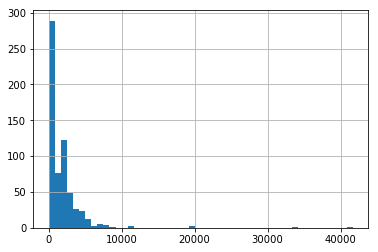

In [21]:
train['CoapplicantIncome'].hist(bins=50)

In [22]:
pd.concat([train['CoapplicantIncome'],np.log(train['CoapplicantIncome']).rename('Log_CoapplicantIncome')],axis = 1)

C:\Users\huynh\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


,CoapplicantIncome,Log_CoapplicantIncome
0,0.0,-inf
1,1508.0,7.318540
2,0.0,-inf
3,2358.0,7.765569
4,0.0,-inf
5,4196.0,8.341887
6,1516.0,7.323831
7,2504.0,7.825645
8,1526.0,7.330405
9,10968.0,9.302737


In [23]:
train[train['CoapplicantIncome']==0.0]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
15,LP001032,Male,No,0,Graduate,No,4950,0.0,125.0,360.0,1.0,Urban,Y
16,LP001034,Male,No,1,Not Graduate,No,3596,0.0,100.0,240.0,NaN,Urban,Y
17,LP001036,Female,No,0,Graduate,No,3510,0.0,76.0,360.0,0.0,Urban,N
18,LP001038,Male,Yes,0,Not Graduate,No,4887,0.0,133.0,360.0,1.0,Rural,N
20,LP001043,Male,Yes,0,Not Graduate,No,7660,0.0,104.0,360.0,0.0,Urban,N
25,LP001066,Male,Yes,0,Graduate,Yes,9560,0.0,191.0,360.0,1.0,Semiurban,Y
28,LP001086,Male,No,0,Not Graduate,No,1442,0.0,35.0,360.0,1.0,Urban,N


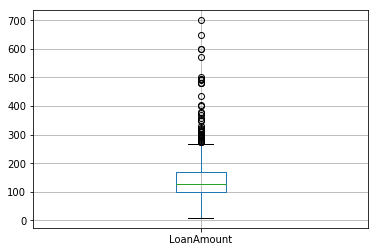

In [24]:
# LoanAmount
train.boxplot(column='LoanAmount')

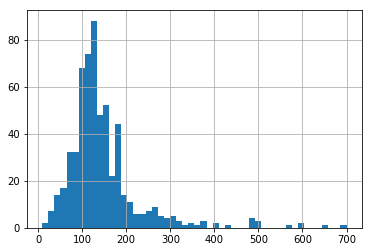

In [25]:
train['LoanAmount'].hist(bins=50)

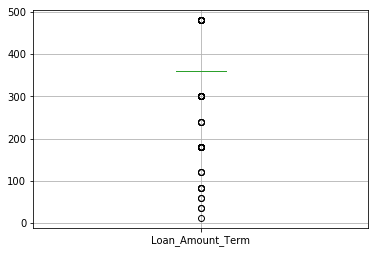

In [26]:
# LoanAmount  
train.boxplot(column='Loan_Amount_Term')

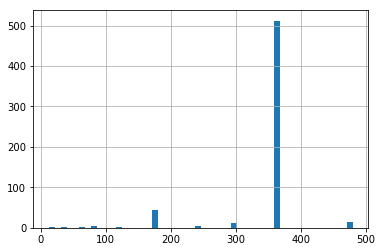

In [27]:
train['Loan_Amount_Term'].hist(bins=50)

In [28]:
# Categorical - categorical variables
ct = pd.crosstab(train['Married'],train['Loan_Status'],margins=True)
print ct

Loan_Status    N    Y  All
Married                   
No            79  134  213
Yes          113  285  398
All          192  419  611


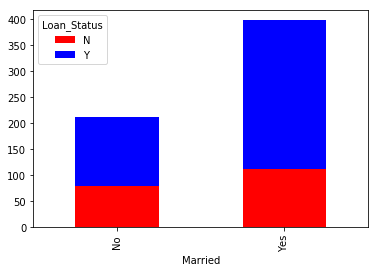

In [29]:
ct.iloc[:-1,:-1].plot(kind='bar',stacked=True,color=['red','blue'])

In [30]:
ct2 = pd.crosstab(train['Credit_History'],train['Loan_Status'],margins=True)
print ct2

Loan_Status       N    Y  All
Credit_History               
0.0              82    7   89
1.0              97  378  475
All             179  385  564


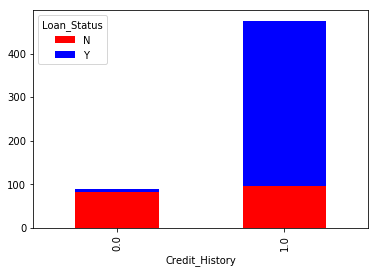

In [31]:
ct2.iloc[:-1,:-1].plot(kind='bar',stacked=True,color=['red','blue'])

In [32]:
def percConvert(ser):
    return ser/float(ser[-1])
ct3 = ct2.apply(percConvert,axis =1)

In [33]:
ct3

Loan_Status,N,Y,All
Credit_History,,,
0.0,0.921348,0.078652,1.0
1.0,0.204211,0.795789,1.0
All,0.317376,0.682624,1.0


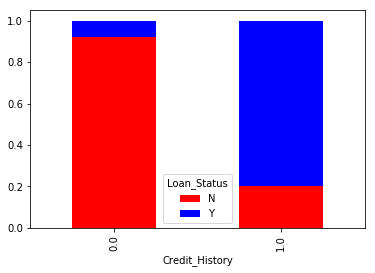

In [34]:
ct3.iloc[:-1,:-1].plot(kind='bar',stacked=True,color=['red','blue'])

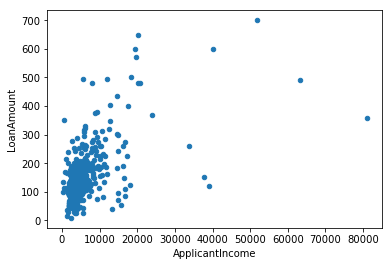

In [35]:
# Continuous - Continuous
train.plot('ApplicantIncome','LoanAmount',kind='scatter')

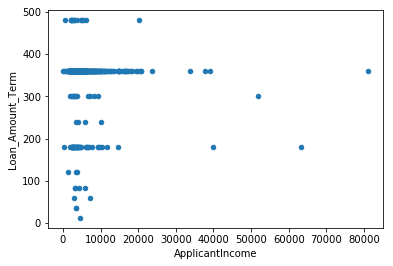

In [36]:
train.plot('ApplicantIncome','Loan_Amount_Term',kind='scatter')

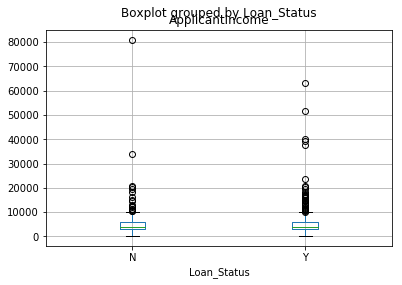

In [37]:
# Continuous - Categorical
train.boxplot(column='ApplicantIncome' ,by ='Loan_Status')

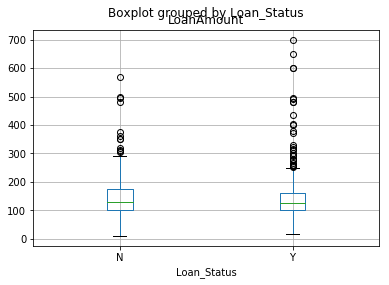

In [38]:
train.boxplot(column='LoanAmount' ,by ='Loan_Status')

In [39]:
# Check missing data
train.apply(lambda x : sum(x.isnull()))

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [40]:
# missing data
train['Gender'].replace(np.nan,'Male',inplace=True)
test['Gender'].replace(np.nan,'Male',inplace=True)

In [41]:
train['Married'].replace(np.nan,'Yes',inplace=True)
test['Married'].replace(np.nan,'Yes',inplace=True)

In [42]:
train['Dependents'].replace(np.nan,'0',inplace=True)
test['Dependents'].replace(np.nan,'0',inplace=True)

In [43]:
test['Self_Employed'].replace(np.nan,'No',inplace=True)
train['Self_Employed'].replace(np.nan,'No',inplace=True)

In [44]:
test['Credit_History'].replace(np.nan,1.0,inplace=True)
train['Credit_History'].replace(np.nan,1.0,inplace=True)

In [45]:
test['LoanAmount'].replace(np.nan,128.0,inplace=True)
train['LoanAmount'].replace(np.nan,128.0,inplace=True)

In [46]:
test['Loan_Amount_Term'].replace(np.nan,360.0,inplace=True)
train['Loan_Amount_Term'].replace(np.nan,360.0,inplace=True)

In [47]:
clean_ups = {'Gender':{'Female':0,'Male':1},
			'Married':{'Yes':1,'No':0},
			'Dependents':{'0':0,'1':1,'2':2,'3+':3},
			'Education':{'Graduate':1,'Not Graduate':0},
			'Self_Employed':{'No':0,'Yes':1},
			'Property_Area':{'Semiurban':1,'Urban':2,'Rural':3},
			'Loan_Status':{'Y':1,'N':0}}
train.replace(clean_ups,inplace=True)
test.replace(clean_ups,inplace=True)

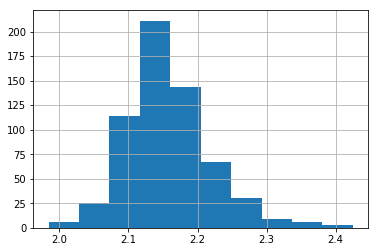

In [48]:
np.log(np.log(train['ApplicantIncome']+ train['CoapplicantIncome'])).hist()

In [49]:
train['TotalIncome']=np.log(np.log(train['ApplicantIncome']+ train['CoapplicantIncome']))
test['TotalIncome']=np.log(np.log(test['ApplicantIncome']+ test['CoapplicantIncome']))

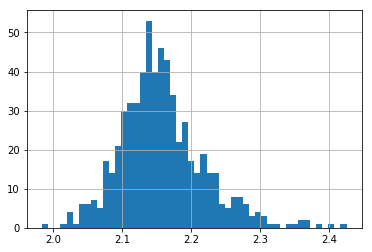

In [50]:
train['TotalIncome'].hist(bins=50)

In [51]:
train['TotalIncome'].describe()

count    614.000000
mean       2.157898
std        0.061239
min        1.984277
25%        2.120429
50%        2.151437
75%        2.188918
max        2.424998
Name: TotalIncome, dtype: float64

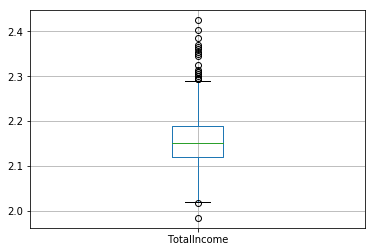

In [52]:
train.boxplot(column='TotalIncome')

In [53]:
train.apply(lambda x: sum(x.isnull()))

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
TotalIncome          0
dtype: int64

In [54]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
Loan_ID              614 non-null object
Gender               614 non-null int64
Married              614 non-null int64
Dependents           614 non-null int64
Education            614 non-null int64
Self_Employed        614 non-null int64
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null float64
Property_Area        614 non-null int64
Loan_Status          614 non-null int64
TotalIncome          614 non-null float64
dtypes: float64(5), int64(8), object(1)
memory usage: 67.2+ KB


# Predictive Modeling

In [55]:
seed = 7
scoring = 'accuracy'

In [56]:
X_train = train.loc[:,['Gender','Married','Dependents','Education','Self_Employed','TotalIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area']]
Y_train = train.loc[:,['Loan_Status']]
X_test = test.loc[:,['Gender','Married','Dependents','Education','Self_Employed','TotalIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area']]


In [57]:
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
# Spot Check Algorithms
models =[]
models.append(('LR',LogisticRegression()))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier(n_neighbors=10)))
models.append(('CART',DecisionTreeClassifier(max_depth=10,min_samples_leaf=100,max_features='sqrt')))
# model = DecisionTreeClassifier(max_depth=10,min_samples_leaf=100,max_features='sqrt')
models.append(('NB',GaussianNB()))
models.append(('SVC',SVC()))
models.append(('RFC',RandomForestClassifier(n_estimators=100)))
# evaluate each model in turn
results = []
names = []

for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

C:\Users\huynh\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\huynh\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\sklearn\model_selection\_validation.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


LR: 0.807985 (0.038146)
LDA: 0.807985 (0.038146)
KNN: 0.635061 (0.057906)
CART: 0.687335 (0.029224)
NB: 0.806372 (0.041129)
SVC: 0.669461 (0.037039)


C:\Users\huynh\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\sklearn\model_selection\_validation.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


RFC: 0.785167 (0.034460)


In [107]:
# Select LogisticRegression() model
model = GaussianNB()
model = model.fit(X_train,Y_train)
model.score(X_train,Y_train)

0.80944625407166126

In [108]:
predicted = model.predict(X_test)

In [61]:
np.savetxt("C:/Trang/Python/dataset/loan_prediction_iii/result.csv",predicted,delimiter=",")

In [69]:
#pd.concat((test['Loan_ID'], predicted ),axis=1)
test['Loan_ID']

0      LP001015
1      LP001022
2      LP001031
3      LP001035
4      LP001051
5      LP001054
6      LP001055
7      LP001056
8      LP001059
9      LP001067
10     LP001078
11     LP001082
12     LP001083
13     LP001094
14     LP001096
15     LP001099
16     LP001105
17     LP001107
18     LP001108
19     LP001115
20     LP001121
21     LP001124
22     LP001128
23     LP001135
24     LP001149
25     LP001153
26     LP001163
27     LP001169
28     LP001174
29     LP001176
         ...   
337    LP002856
338    LP002857
339    LP002858
340    LP002860
341    LP002867
342    LP002869
343    LP002870
344    LP002876
345    LP002878
346    LP002879
347    LP002885
348    LP002890
349    LP002891
350    LP002899
351    LP002901
352    LP002907
353    LP002920
354    LP002921
355    LP002932
356    LP002935
357    LP002952
358    LP002954
359    LP002962
360    LP002965
361    LP002969
362    LP002971
363    LP002975
364    LP002980
365    LP002986
366    LP002989
Name: Loan_ID, Length: 3

In [111]:
result=pd.merge(test, pd.DataFrame(predicted,columns=['Loan_Status']), left_index=True, right_index=True)

In [113]:
result.loc[:,['Loan_ID','Loan_Status']].to_csv("C:/Trang/Python/dataset/loan_prediction_iii/result.csv")